In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Daten der Geschäfte laden aus JSON Format
biz_file =  open('yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [3]:
biz_df['log_review_count']=np.log10(biz_df['review_count']+1)

Text(0, 0.5, 'Occurrence')

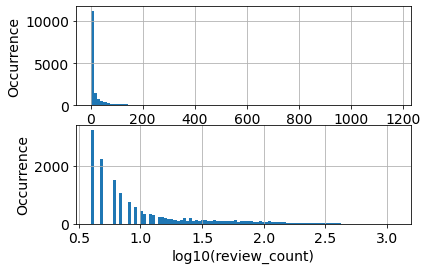

In [4]:
fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)
biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

In [6]:
# Am Werk


# Beispiel 2.8 - Count vs. Sterne?

# Lerne lineare Regressionsmodelle an, um die mittlere Sternebewertung eines
# Geschäfts anhand des Merkmals review_count mit und ohne
# Logarithmustransformation vorherzusagen.
# Vergleiche die Bewertun beider Modelle nach zehnfacher Kreuzvalidierung.
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (scores_orig.mean(), 2*scores_orig.std()))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (scores_log.mean(), 2*scores_log.std()))

R-squared score without log transform: 0.00179 (+/- 0.00417)
R-squared score with log transform: 0.00069 (+/- 0.00585)


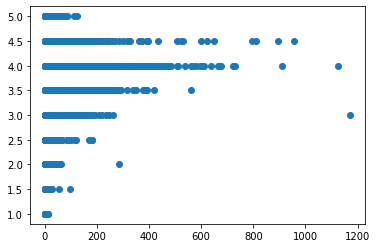

In [14]:
plt.scatter(biz_df[['review_count']], biz_df['stars'])

# Total bescheuert sowas mit einem linearen Model zu machen

In [91]:
# Beispiel 2.9 - Online News

# Datensatz

df = pd.read_csv('data/ONP_sub_test.csv',delimiter=',', skipinitialspace=True)



df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [92]:
# Bilde die Logarithmustransformation des Merkmals 'n_tokens_content', das
# die Zahl der Wörter (Tokens) in einer Meldung beschreibt.
#df['log_n_tokens_content'] = np.log10(df['n_tokens_content']+1)
print(df.columns)
#print(df['timedelta'])
#df.head()

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     